In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Get label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

## Import dataset

In [4]:
df=pd.read_excel('Amazon_online_review_data.xlsx')

## Data Exploration

In [5]:
df

,Review_ID,Product_ID,User_ID,Product_Score,Average_Product_Score,Product_Category,Reviewer_Helpfulness,Reviewer_Activity,Review_Order,Review Count,Review_Summary,Review_Text,Total_Reads,Helpfulness_Label
0,223656,B006BXV130,A2GQ4LBUYKU7JH,1,3.528000,Grocery & Gourmet Food,0.363636,1,1,125,"Krap, No Krave!",There are no words sufficient to describe how ...,11,UNHELPFUL
1,223657,B006BXV130,A3JV6I7O8DOIT6,1,3.528000,Grocery & Gourmet Food,0.153846,3,2,125,Terrible Cereal,This is one of the worst tasting cereals I've ...,8,UNHELPFUL
2,223666,B006BXV130,A18QYW376136IE,5,3.528000,Grocery & Gourmet Food,0.666667,1,3,125,Great cereal!,I first had this cereal when I was living in F...,3,HELPFUL
3,127482,B005VOONKI,A2LUM8T4MTYTYL,1,3.846690,Grocery & Gourmet Food,0.000000,11,1,288,Not ESE pods!,It is not obvious from the product description...,2,UNHELPFUL
4,135423,B005VOOM4A,A2LUM8T4MTYTYL,1,3.846690,Grocery & Gourmet Food,0.000000,11,1,288,Not ESE pods!,It is not obvious from the product description...,2,UNHELPFUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,200465,B008O2EHNC,A11X0ENDTFGCEH,5,4.565217,Grocery & Gourmet Food,NaN,2,46,46,"Enjoyable, quick cups of coffee with no waste",My mother loves this coffee and the pods fit h...,0,UNHELPFUL
8554,337265,B007OSBE1U,A2R28IOP06EH4X,2,4.372549,Grocery & Gourmet Food,NaN,2,51,58,No Consistency,I purchased the variety pack of Martinsons and...,0,UNHELPFUL
8555,388652,B007TGO1TY,A1N655X9X7C6QY,4,3.553191,Grocery & Gourmet Food,0.621212,47,46,47,Its LIGHT but very nice sweetener,This Nectresse Sweetener is rather light in ta...,0,UNHELPFUL
8556,388653,B007TGO1TY,A2LEO7WT1VIMKZ,5,3.553191,Grocery & Gourmet Food,NaN,1,47,47,This stuff is great!,I'm surprised to see so many negative comments...,0,UNHELPFUL


In [6]:
#Function to check the balance of Helpfulness_Label
#Returns number and percentage of each Label
def check_help_balance(dataframe):
    print('Number of HELPFUL: ', len(dataframe[dataframe['Helpfulness_Label'] == 'HELPFUL']))
    print('Number of UNHELPFUL: ', len(dataframe[dataframe['Helpfulness_Label'] == 'UNHELPFUL']))
    print('The ratio of the dataset is (HELPFUL / UNHELPFUL): %.2f%% / %.2f%%' % 
          ((round((len(dataframe[dataframe['Helpfulness_Label'] == 'HELPFUL']) / len(dataframe)) * 100 , 2)), 
          (round((len(dataframe[dataframe['Helpfulness_Label'] == 'UNHELPFUL']) / len(dataframe)) * 100 , 2))))
    print("")

#Function to check the balance of Total_Reads
#Returns number and percentage of each Label
def check_read_balance(dataframe):
    print('Number of 0 reads: ', len(dataframe[dataframe['Total_Reads'] == 0]))
    print('Number of greater-than 0 reads: ', len(dataframe[dataframe['Total_Reads'] > 0]))
    print('The ratio of the dataset is (zero / greater-than zero): %.2f%% / %.2f%%' % 
          ((round((len(dataframe[dataframe['Total_Reads'] == 0]) / len(dataframe)) * 100 , 2)), 
          (round((len(dataframe[dataframe['Total_Reads'] > 0]) / len(dataframe)) * 100 , 2))))
    print("")


In [7]:
#Check Dimensions of data
print('\033[1m\033[34m' + '\033[4m' + "The shape of the inital dataset is (Rows, Columns):\n" + '\033[0m' \
      + str(df.shape))
print("")

#Check data types
print('\033[1m\033[34m' + '\033[4m' + "The data types of the inital dataset are:\n" + '\033[0m' + \
     str(df.dtypes))
print("")

#Check for Null Values
print('\033[1m\033[34m' + '\033[4m' + "The number of null values in each column:\n" + '\033[0m' + \
     str(df.isna().sum().sort_values(ascending=False)))

#Check for duplicates
data_duplicates = df[df.duplicated('Review_Text') == True]
print('\033[1m\033[34m' + '\033[4m' + "\nThe number of duplicate Review_Texts in dataset:\n" + '\033[0m' + \
     str(data_duplicates.shape[0]))

#Check the balance of Class Targert
print('\033[1m\033[34m' + '\033[4m' + '\nBalance of classification target (Helpfulness_Label)' + '\033[0m')
check_help_balance(df)

#Check the balance of Prediction Targert
print('\033[1m\033[34m' + '\033[4m' + '\nBalance of prediction target (Total_Reads)' + '\033[0m')
check_read_balance(df)

The shape of the inital dataset is (Rows, Columns):
(8558, 14)

The data types of the inital dataset are:
Review_ID                  int64
Product_ID                object
User_ID                   object
Product_Score              int64
Average_Product_Score    float64
Product_Category          object
Reviewer_Helpfulness     float64
Reviewer_Activity          int64
Review_Order               int64
Review Count               int64
Review_Summary            object
Review_Text               object
Total_Reads                int64
Helpfulness_Label         object
dtype: object

The number of null values in each column:
Reviewer_Helpfulness     930
Review_Text                1
Helpfulness_Label          0
Total_Reads                0
Review_Summary             0
Review Count               0
Review_Order               0
Reviewer_Activity          0
Product_Category           0
Average_Product_Score      0
Product_Score              0
User_ID                    0
Product_ID                 

## Data preperation

In [8]:
#Remove columns that are not required
df = df.drop(["Review_ID", "Product_ID", "User_ID"], axis = 1)

#Remove Null Entries
df = df.dropna()

#Drop duplicates in dataset
df.drop_duplicates('Review_Text', keep='last', inplace=True)

#Transform Product_Category and Helpfulness_Label to numeric values (0=HELPFUL, 1=UNHELPFUL)
df[['Helpfulness_Label']] = df[['Helpfulness_Label']].apply(le.fit_transform)
df[['Product_Category']] = df[['Product_Category']].apply(le.fit_transform)

#Remove noise (Total_reads = 0 means the review haven't been seen and will always be unhelpful)
df = df[df['Total_Reads'] > 0]

#Shuffle dataframe and reset indexs to match number of rows
df = df.sample(frac=1).reset_index(drop=True)

## Setup Sentimental Analysis

In [9]:
sentence_list = df['Review_Text'].tolist()
summary_list = df['Review_Summary'].tolist()
sentimental_text_list = []
sentimental_summary_list = []

#Import and initialise VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#Append sentimental list's with compunded sentimental score
for sentence in sentence_list:
    text_score = analyser.polarity_scores(sentence)['compound']
    sentimental_text_list.append(text_score)

for summary in summary_list:
    summary_score = analyser.polarity_scores(summary)['compound']
    sentimental_summary_list.append(summary_score)
    
#Convert to dataframe 
sentimental_summary_df=pd.DataFrame(sentimental_summary_list,columns=['Sentimental_Summary_Score'])
sentimental_text_df=pd.DataFrame(sentimental_text_list,columns=['Sentimental_Text_Score'])

#Concatenate to main dataframe
sentimentalData = pd.concat([df, sentimental_summary_df, sentimental_text_df], axis=1)

In [10]:
sentimentalData[['Review_Summary','Sentimental_Summary_Score','Review_Text','Sentimental_Text_Score']].iloc[0:10,:]

,Review_Summary,Sentimental_Summary_Score,Review_Text,Sentimental_Text_Score
0,Weak brew,-0.4404,No instructions on packaging that I could find...,-0.3535
1,Your curly hair will love you for using this!,0.6696,I received this shampoo weeks ago and have bee...,0.9712
2,Happy and healthy dogs--thanks to me--and Purina.,0.7506,I've fed our dogs and cats Purina products (Do...,0.9818
3,Dog likes it,0.4215,My dog has been eating this stuff for about ei...,0.9061
4,Good food for those who hate their dogs,-0.2023,"But who hates their dog? We sure don't, so we ...",-0.9588
5,I really wanted to like this!,0.4688,We bought a citiz nespresso maker and hate bei...,0.9450
6,Refreshing and Tasty,0.0000,I've had a number of instant drink packet mixe...,0.9889
7,Didn't like the carrots and peas.,-0.2755,I compared this to Purina Dog Chow which is my...,0.4034
8,WARNING!!!!,-0.5526,Warning!!! That's exactly what it should say o...,0.3971
9,"I'm not a fan of Kool Aid, but this isn't too ...",0.5096,"I kind of like the flavor of this stuff. But,...",0.9856


## View correlation of balanced dataset

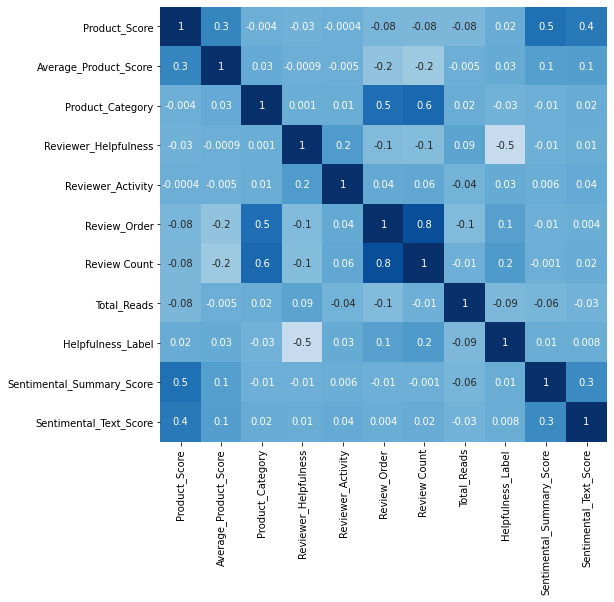

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sentimentalData.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='Blues', cbar=False)

## Remove highly correlated feature(Review_Order)

In [11]:

sentimentalData = sentimentalData.drop(["Review_Order"], axis = 1)

In [12]:
import nltk
# nltk.download('stopwords') for update stopwords lib
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

## Setup TF_IDF & Topic generation

In [13]:
stop_words = stopwords.words('english')
snowball_stemmer = SnowballStemmer('english')

##Bag of words
#Tokenize sentence on each row
tokenized_text=sentimentalData['Review_Text'].apply(word_tokenize)
tokenized_summary=sentimentalData['Review_Summary'].apply(word_tokenize)

#Convert tokens to lowercase
lower_text=tokenized_text.apply(lambda x: [word.lower() for word in x])
topic_text=tokenized_text.apply(lambda x: [word.lower() for word in x])
lower_summary=tokenized_summary.apply(lambda x: [word.lower() for word in x])

#Remove any stop words
filtered_text=lower_text.apply(lambda x: [word for word in x if word not in stop_words])
filtered_topic=topic_text.apply(lambda x: [word for word in x if word not in stop_words])
filtered_summary=lower_summary.apply(lambda x: [word for word in x if word not in stop_words])

#Implement stemming
filtered_stemized_text=filtered_text.apply(lambda x: [snowball_stemmer.stem(word) for word in x ])
topic_stemized_text=filtered_topic.apply(lambda x: [snowball_stemmer.stem(word) for word in x ])
filtered_stemized_summary=filtered_summary.apply(lambda x: [snowball_stemmer.stem(word) for word in x ])


#Remove words less than 4 chars or more than 11
filtered_length_text=filtered_stemized_text.apply(lambda x: [word for word in x if len(word)>3 and
len(word)<12])
topic_length_text=topic_stemized_text.apply(lambda x: [word for word in x if len(word)>3 and
len(word)<12])
filtered_length_summary=filtered_stemized_summary.apply(lambda x: [word for word in x if len(word)>3 and
len(word)<12])

##Convert to token counts
#Initialise count vector
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, preprocessor = lambda x: x, tokenizer = lambda
x: x)

#Create term doc matrices
text_vectorized=vectorizer.fit_transform(filtered_length_text).toarray()
summary_vectorized=vectorizer.fit_transform(filtered_length_summary).toarray()
topic_vectorized=vectorizer.fit_transform(topic_length_text).toarray()

In [14]:
##Find TF_IDF
#Initialise TF-TF_IDF converter
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()

#Perform TF_IDF on term doc matrices
TFIDF_text = tfidfconverter.fit_transform(text_vectorized).toarray()
TFIDF_summary = tfidfconverter.fit_transform(summary_vectorized).toarray()

In [15]:
print(TFIDF_text.shape)
print(TFIDF_summary.shape)

(2366, 9021)
(2366, 1386)


## Implement SVD

In [16]:
#Create titles for each SVD column
n_components = 3
i = 1
column_names = []
while i <= n_components:
    cName = 'SVD Text' + str(i)
    column_names.append(cName)
    i += 1
    
i=1
summary_column_names = []
while i <= n_components:
    cName = 'SVD Summary' + str(i)
    summary_column_names.append(cName)
    i += 1

#Initialise SVD model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized', n_iter=100)

#Perform dimension reduction
svd_text_vectorized=svd_model.fit_transform(TFIDF_text)
svd_summary_vectorized=svd_model.fit_transform(TFIDF_summary)

#Convert array to a dataframe
svd_text_df = pd.DataFrame(svd_text_vectorized, columns=column_names)
svd_summary_df = pd.DataFrame(svd_summary_vectorized, columns=summary_column_names)

#Add SVD to main dataframe
data_SVD= pd.concat([sentimentalData, svd_text_df, svd_summary_df], axis=1)

## Topic Modelling

In [17]:
#Initialise LDA model
from sklearn.decomposition import LatentDirichletAllocation
LDA_text = LatentDirichletAllocation(n_components=5, random_state=42)

##Fit term doc matrices into LDA
LDA_text.fit(topic_vectorized)

#Retrieve topic percentages from each row
text_topic_values = LDA_text.transform(topic_vectorized)

#Create new column and add topic number with highest percentage
data_topics = data_SVD
data_topics['Text_Topic'] = text_topic_values.argmax(axis=1)

for i,topic in enumerate(LDA_text.components_):
    print(f'Top 10 words for Text Topic #{i+1}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for Text Topic #1:
['sugar', 'love', 'would', 'flavor', 'chocol', 'good', 'cereal', 'like', 'tast', 'coffe']


Top 10 words for Text Topic #2:
['seem', 'good', 'feed', 'love', 'would', 'corn', 'bene', 'ingredi', 'like', 'food']


Top 10 words for Text Topic #3:
['love', 'great', 'chip', 'k-cup', 'good', 'coffe', 'tast', 'cooki', 'like', 'flavor']


Top 10 words for Text Topic #4:
['sweet', 'bottl', 'sweeten', 'vitamin', 'product', 'drink', 'water', 'flavor', 'like', 'tast']


Top 10 words for Text Topic #5:
['would', 'feel', 'smell', 'clear', 'like', 'condition', 'scalp', 'product', 'shampoo', 'hair']




## Select number of cluster

In [18]:
def compare_clusters(cMethod, data):
    ##Evaluate how many clusters to use
    from sklearn.cluster import KMeans
    from sklearn.cluster import DBSCAN
    import matplotlib.pyplot as plt
    import warnings
    #Remove Review Summary and Review_Text (No longer required)
    data_clustered = data.drop(["Review_Summary", "Review_Text"], axis = 1)

    #Initialise cluster validation df
    cluster_val = pd.DataFrame(columns = ["Davies Bouldin Score", "Silhouette Score"])

    #Loop through 2-10 clusters
    for k in range(2, 11):
        #Initialise clusters with n_clusters=loop value
        clust = cMethod(n_clusters=k, max_iter=10000)

        #Fit model and assign labels to an array
        My_clustering=clust.fit(data_clustered)
        labels = My_clustering.labels_

        #Ignore warnings due to Davies Bouldin Score producing annoying runtime warning
        warnings.filterwarnings("ignore")

        #Setup score gathering metrics
        from sklearn import metrics
        from sklearn.metrics import davies_bouldin_score
        from sklearn.metrics import silhouette_score
#         from sklearn.metrics import calinski_harabasz_score
        from sklearn.metrics import pairwise_distances

        #Set each score into array having 1 tuple for the three scores
        scores = [
            (
            round(davies_bouldin_score(data_clustered, labels), 2),
                   round(silhouette_score(data_clustered, labels), 2),
        )
        ]

        #Initilise and fill iteration cluster df with the scores
        cluster_iter = pd.DataFrame(scores, columns = ["Davies Bouldin Score", "Silhouette Score"])

        #Append to main df
        cluster_val = cluster_val.append(cluster_iter, ignore_index=True, sort = False)

    #Return warnings to normal
    warnings.filterwarnings("default")

    #Change indexs and index title to match clusters
    cluster_val = cluster_val.set_index([pd.Index([2,3,4,5,6,7,8,9,10])])
    cluster_val.index.names = ['Clusters']
    print(cluster_val)

In [19]:
from sklearn.cluster import KMeans
compare_clusters(KMeans, data_topics)
# C=2 is the best

          Davies Bouldin Score  Silhouette Score
Clusters                                        
2                         0.43              0.71
3                         0.41              0.70
4                         0.52              0.65
5                         0.47              0.66
6                         0.56              0.68
7                         0.55              0.67
8                         0.52              0.67
9                         0.57              0.64
10                        0.60              0.61


## Clustering

In [20]:
#Initialise cluster analysis
from sklearn.cluster import KMeans
    
#Remove Review Summary and Review_Text (No longer required and cannot be used in clustering)
data_clustered = data_topics.drop(["Review_Summary", "Review_Text"], axis=1)

# Normalize data
normalized_df=(data_clustered-data_clustered.min())/(data_clustered.max()-data_clustered.min())



In [21]:
## Alternative normalization solution: 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = data_clustered.values #returns a numpy array
# x_scaled = scaler.fit_transform(x)
# data_clustered = pd.DataFrame(x_scaled)


In [22]:
# Separate the helpfulness_label before clustering to avoid overfitting.
normalized_df_1 = normalized_df.drop(["Helpfulness_Label"], axis=1)
normalized_df_2 = normalized_df[["Helpfulness_Label"]]


In [23]:
#Fit model
kmeans = KMeans(n_clusters=2, max_iter=10000)
y = kmeans.fit_predict(normalized_df_1)

#Set labels column
normalized_df_1["Cluster"] = y

df_prepared = pd.concat([normalized_df_1, normalized_df_2], axis=1)

In [24]:
df_prepared

,Product_Score,Average_Product_Score,Product_Category,Reviewer_Helpfulness,Reviewer_Activity,Review Count,Total_Reads,Sentimental_Summary_Score,Sentimental_Text_Score,SVD Text1,SVD Text2,SVD Text3,SVD Summary1,SVD Summary2,SVD Summary3,Text_Topic,Cluster,Helpfulness_Label
0,0.00,0.628364,0.25,0.428571,0.000000,0.140998,0.060606,0.726477,0.996446,0.630512,0.714219,0.367690,1.945433e-03,0.426293,0.468195,1.00,1,1.0
1,1.00,0.706540,0.25,0.125000,0.031100,0.136659,0.000000,0.837293,0.972231,0.569522,0.720136,0.402520,8.535865e-01,1.000000,0.435683,1.00,1,1.0
2,0.50,0.819664,0.50,0.680851,0.078947,0.286334,0.050505,0.308357,0.916743,0.318330,0.286570,0.318150,1.415849e-29,0.427254,0.466002,0.00,0,1.0
3,0.75,0.521095,0.50,0.500000,0.016746,0.720174,0.000000,0.887135,0.821759,0.414758,0.149276,0.272508,4.314153e-01,0.190954,0.186568,0.75,0,1.0
4,1.00,0.799080,0.50,1.000000,0.002392,0.060738,0.000000,0.823725,0.893847,0.266717,0.182181,0.729970,1.474024e-02,0.419654,0.462299,0.50,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,1.00,0.618416,0.50,0.333333,0.043062,0.138829,0.010101,0.855402,0.957661,0.142811,0.348395,0.352616,8.798596e-01,0.750000,0.605193,0.25,0,1.0
2362,0.75,0.734149,0.50,0.222222,0.040670,0.147505,0.000000,0.484577,0.933394,0.246212,0.212248,0.316485,4.624016e-03,0.425181,0.470656,0.75,0,1.0
2363,0.75,0.720370,0.25,0.800000,0.081340,0.147505,0.000000,0.830647,0.997665,0.800877,0.725555,0.367538,4.420398e-01,0.211594,0.976028,1.00,1,0.0
2364,1.00,0.515963,1.00,0.327586,0.107656,0.973970,0.000000,0.386055,0.961316,0.159753,0.344656,0.292554,3.826760e-02,0.435551,0.463512,0.25,0,0.0


In [25]:
#Send prepared data to excel
df_prepared.to_excel("After_Data_Preperation.xlsx", index=False)